In [225]:
import numpy as np
import warnings
from numpy import linalg as LA 
from numpy import cos, sin, pi, exp
import matplotlib.pyplot as plt
import matplotlib as mpl


# Тема IV

IV.12.4д;

Отделить корни следующих уравнений, а затем уточнить один из них с помощью подходящего итерационно процесса

$$
\arctg(x-1) + 2\cdot x = 0
$$

0.3
0.32499999999999996
0.3125
0.30625
0.303125
0.3046875
0.30390625
0.304296875
0.3041015625
0.30400390624999996
0.30405273437499997
tolerance = 4.88e-05


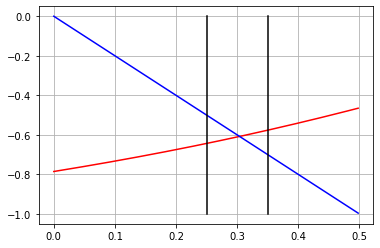

In [194]:
x = np.arange(0, 0.5, 0.003)

plt.plot(x, np.arctan(x-1), 'r', x, -2*x, 'b')
plt.plot([0.25, 0.25], [-1, 0], 'k', [0.35, 0.35], [-1, 0], 'k')
plt.grid()

a = 0.25
b = 0.35
N = 11

def f(t): return np.arctan(t-1) + 2*t

def bisection(f, a, b, N):
    c = (a + b)/2
    print(c)
    if (f(c)==0 or (N == 1)): 
        return c
    else:
        l_sign = np.sign(f(a)*f(c))
        r_sign = np.sign(f(c)*f(b))
        if (l_sign < r_sign): bisection(f, a, c, N-1) 
        else: bisection(f, c, b, N-1)

x0 = bisection(f, a, b, N)

epsilon = (b-a)*2**(-N); epsilon 
print('tolerance = {:.2e}'.format(epsilon))


IV.12.5г

Вычислить с точностью $\varepsilon = 10 ^{–3}$ координаты точек пересечения кривых.
$$
\sin(x+2) - y = 1.5\\
x + \cos(y-2) = 0.5
$$

3 [ 1.34633765 -1.70331749]
norm of error =1.73817
norm of error =1.39573e-09


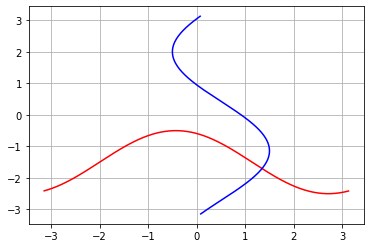

In [254]:
y = np.arange(-np.pi, np.pi, 0.03)
plt.plot(y, np.sin(y+2) - 1.5, 'r', -np.cos(y-2)+0.5, y, 'b')
plt.grid()

def newton_system(F, J, x, eps):
    F_value = F(x)
    F_norm = np.linalg.norm(F_value, ord=2)  
    iteration_counter = 0

    while abs(F_norm) > eps and iteration_counter < 100:
        delta = np.linalg.solve(J(x), -F_value)
        x = x + delta
        F_value = F(x)
        F_norm = np.linalg.norm(F_value, ord=2)
        iteration_counter += 1

    if abs(F_norm) > eps:
        iteration_counter = -1
    return x, iteration_counter


def test_newton_system1():
    def F(x):
        return np.array(
            [sin(x[0]+2) - x[1] - 1.5,
             x[0] + cos(x[1] -2) - 0.5])

    def J(x):
        return np.array(
            [[cos(x[0] + 2), -1],
             [1, -sin(x[1] - 2)]])

    expected = np.array([1, 0])
    #tol = 1e-5
    x, n = newton_system(F, J, x=np.array([1.0, -1.5]), eps=1e-5)
    print(n, x)
    error_norm = np.linalg.norm(expected - x, ord=2)
    error_norm2 = np.linalg.norm( F(x), ord=2)
    #assert error_norm < tol, 'norm of error =%g' % error_norm
    print('norm of error =%g' % error_norm)
    print('norm of error =%g' % error_norm2)


test_newton_system1()

# Тема V

Задачи нахождения экстремума функции

V.7.1г

Используя методы дихотомии и сведения вариационной задачи к задаче алгебраического уравнения, найти точку локального минимума функции:

$$
f(t) = t\cdot e^{-t^2/2}
$$


 First method 

iterations:  6
-1.0
-1.25
-1.125
-1.0625
-1.03125
-1.015625
-1.0078125

 Second method 

-1.0
-1.0 local minima


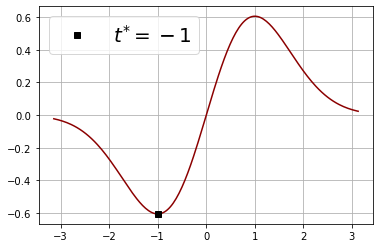

In [196]:
plt.plot(y, y*np.exp(-y**2/2), 'darkred')
plt.plot(-1, -1*np.exp(-1/2), 'ks', label = '$t^{*}= -1$')
plt.legend(fontsize = 20)
plt.grid()

a = -1.5
b = -0.5
delta = 10e-4
epsilon = 10e-3

print("\n First method \n")

N = round(np.log2(np.abs((b-a-delta)/(2*epsilon - delta ))))
print("iterations: ", N)

def f(t): return t*np.exp(-t**2/2)

def bisection2(f, a, b, N, delta, epsilon):
    c = (a + b)/2
    print(c)
    f1 = f(c - delta)
    f2 = f(c+ delta)
    if ((N == 0)or(np.abs(b-a)<=epsilon)): 
        return c
    else:
        if (f1 < f2): bisection2(f, a, c, N-1, delta, epsilon) 
        else: bisection2(f, c, b, N-1, delta, epsilon)

x0 = bisection2(f, a, b, N, delta, epsilon)


print("\n Second method \n")
def f1(t): return (1 - t**2)*np.exp(-t**2/2)
def f2(t): return -t*(3+ t**2)*np.exp(-t**2/2)

def bisection_min_alg(f1, f2, a, b, N):
    x0 = bisection(f1, a, b, N)
    if (np.sign(f2(x0))==1): print(x0, 'local minima')

bisection_min_alg(f1, f2, a, b, N)



 V.7.5г

 Методом покоординатного спуска найти точки локального минимума функций

 Приводя уравнение эллипса к каноническому виду:
 $$
f(x, y) = 2(x - \dfrac{y+7}{2})^2 + 3 (y-1)^2
 $$
 Находим линии уровня:
 $$
f(x, y) = C
 $$

 Замена:

$$ 
(2x - y - 7)^2 + 3 (y-1)^2 = \hat{C} 
$$
$$
f(u_1, u_2) = u_1^2 + u_2^2 
$$
$$
u_1 = 2x - y - 7 \qquad
u_2 = \sqrt{3}(y - 1)
$$

Начальное приближение:

$$
(x^{(0)}, y^{(0)}) = (0, 0)
$$


In [197]:
u = np.arange(-25, 20 , 0.002)


def fxy(x, y): return 2*(x-(y+7)/2)**2 + 3/2*(y-1)**2
def dfx(x, y): return 4*(x-(y+7)/2) 
def dfy(x, y): return -2*(x-(y+7)/2) + 3*(y-1)

def coord_descent(fxy, dfx, dfy, x0, y0, N):
    x1 = 1/4*(2*y0 +14)
    y1 = 1/4*(2*x1-4)
    print(x1, y1)
    if (N==1): return [x1, y1, fxy(x1, y1)]
    else: coord_descent(fxy, dfx, dfy, x1, y1, N-1)

x0 = y0 = 0
N = 10

min_sol = coord_descent(fxy, dfx, dfy, x0, y0, N)

print(min_sol)

3.5 0.75
3.875 0.9375
3.96875 0.984375
3.9921875 0.99609375
3.998046875 0.9990234375
3.99951171875 0.999755859375
3.9998779296875 0.99993896484375
3.999969482421875 0.9999847412109375
3.9999923706054688 0.9999961853027344
3.999998092651367 0.9999990463256836
None


# Тема VI

## К3(в)

Для заданной функции y=f(x) построить интерполяционный многочлен на заданном отрезке по ее значениям, округленным до 3 знаков после запятой, на равномерной сетке с N+1 узлом. Исследуйте, как при различных значениях N ведет себя интерполянт. При каком значении N результат наилучший?

$$ y=ln(1+x),\text{    } x\in[0,1] $$

In [255]:
N_max = 20
N = np.arange(0, N_max, 1)

Y = dict.fromkeys(N)
A = dict.fromkeys(N)

for n in N:
    y = np.linspace(0, 1, n+1)
    Y[n] = np.log(1 + y)
    if n<10: print(Y[n])
    
print("...")

[0.]
[0.         0.69314718]
[0.         0.40546511 0.69314718]
[0.         0.28768207 0.51082562 0.69314718]
[0.         0.22314355 0.40546511 0.55961579 0.69314718]
[0.         0.18232156 0.33647224 0.47000363 0.58778666 0.69314718]
[0.         0.15415068 0.28768207 0.40546511 0.51082562 0.6061358
 0.69314718]
[0.         0.13353139 0.25131443 0.35667494 0.45198512 0.5389965
 0.61903921 0.69314718]
[0.         0.11778304 0.22314355 0.31845373 0.40546511 0.48550782
 0.55961579 0.62860866 0.69314718]
[0.         0.10536052 0.2006707  0.28768207 0.36772478 0.44183275
 0.51082562 0.57536414 0.63598877 0.69314718]
...



Задана $n+1$ пара чисел ${\displaystyle (x_{0},y_{0}),(x_{1},y_{1}),\ldots ,(x_{n},y_{n}),}$ где все $x_{j}$ различны. $\newline$
Требуется построить многочлен $L(x)$ степени не более $n$ , для которого 
$$ L(x_{j})=y_{j}$$

$$
\begin{cases}
a_0 + a_1 x_0 + a_2 x_0^2 + \dots + a_n x_0^n = y_0,\\
a_0 + a_1 x_1 + a_2 x_1^2 + \dots + a_n x_1^n = y_1,\\
\dots\dots\dots\dots\dots\dots\dots\dots\dots\dots\dots\dots,\\
a_0 + a_1 x_n + a_2 x_n^2 + \dots + a_n x_n^n = y_n\\
\end{cases}
$$

Матрица Вандермонда:

$$
\begin{bmatrix}
1 & x_0 & x_0^2 & \dots & x_0^n \\
1 & x_1 & x_1^2 & \dots & x_1^n \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_n & x_n^2 & \dots & x_n^n \\
\end{bmatrix}
\begin{bmatrix}
a_0 \\ a_1 \\ \vdots \\ a_n
\end{bmatrix} = \begin{bmatrix}
y_0 \\ y_1 \\ \vdots \\ y_n
\end{bmatrix}
$$

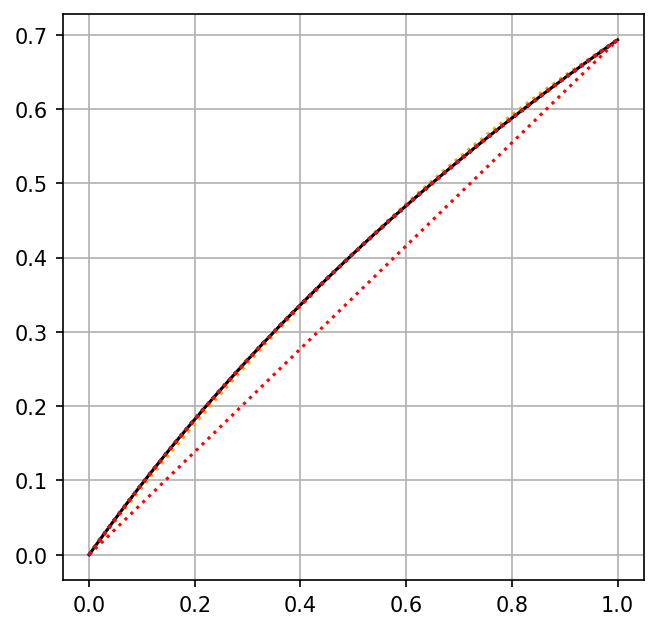

In [256]:
fig= plt.figure(figsize=(5, 5), dpi=150)
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["r", "orange", "yellow", "green","b", "purple"])


x = np.linspace(0, 1, 1000)
y_true = np.log(1 + x)

plt.plot(x,y_true, 'k')

error = np.zeros(N_max)


# Lagrange polynomial
for n in N:
    W = np.zeros(shape = (n+1, n+1))
    xi = np.linspace(0, 1, n+1)
    for i in range(n+1):
        for j in range(n+1): W[i][j] = xi[i]**j

    a = LA.solve(W, Y[n])
    A[n] = a
    poly1 = np.poly1d(np.flip(a))
    error[n] = LA.norm(y_true - poly1(x))

    if n!=0: plt.plot(x, poly1(x), linestyle = ':')


plt.grid()

plt.savefig("Lagrange")



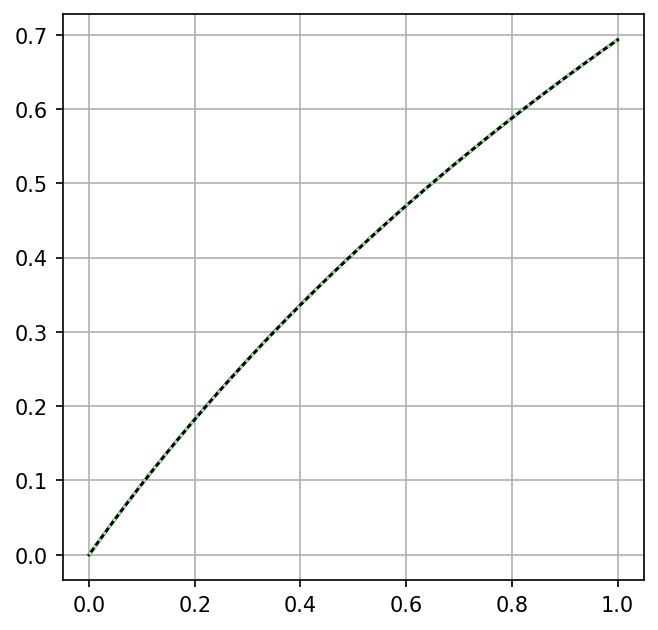

In [200]:
fig2 = plt.figure(figsize=(5, 5), dpi=150)
plt.plot(x, y_true, 'k')

poly5 = np.poly1d(np.flip(A[5]))
plt.plot(x, poly5(x), ':', color = 'lightgreen')
plt.grid()

$$
n_j(x) := \prod_{i=0}^{j-1} (x - x_i) \qquad j=1,\ldots,k.
$$

$$
\begin{bmatrix}
      1 &         & \ldots &        & 0  \\
      1 & x_1-x_0 &        &        &    \\
      1 & x_2-x_0 & (x_2-x_0)(x_2-x_1) &        & \vdots   \\
 \vdots & \vdots  &        & \ddots &    \\
      1 & x_k-x_0 & \ldots & \ldots & \prod_{j=0}^{k-1}(x_k - x_j)
\end{bmatrix}
\begin{bmatrix}     a_0 \\     \\     \vdots \\     \\     a_{k} \end{bmatrix} =
\begin{bmatrix}      y_0 \\  \\  \vdots \\ \\    y_{k} \end{bmatrix}

$$

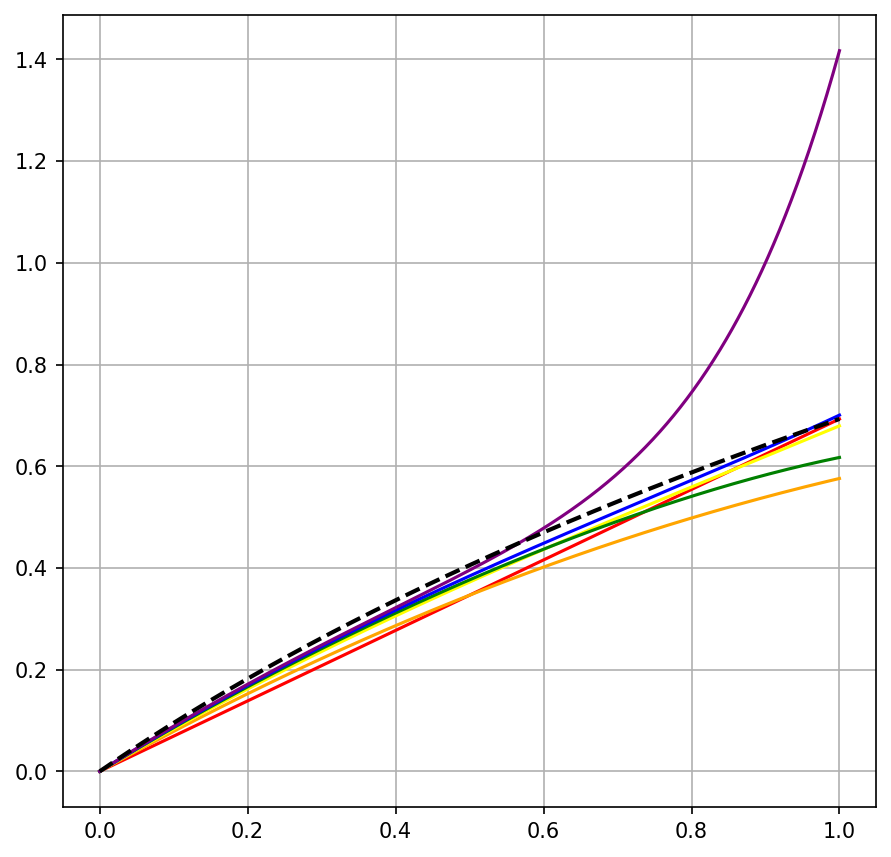

In [201]:
fig3 = plt.figure(figsize=(7, 7), dpi=150)

x = np.linspace(0, 1, 1000)
y_true = np.log(1 + x)

errorN = np.zeros(N_max)

# Newton Polynomial

for n in N[0:7]:
    xi = np.linspace(0, 1, n+1)

    NP = np.zeros(shape = (n+1, n+1))
    for i in range(n+1):
        NP[i][0] = 1

    for i in range(1, n+1):
        for j in range(1, n+1): NP[i][j] = NP[i][j-1]*(xi[i] - xi[j-1])
    a = LA.solve(NP, Y[n])
    A[n] = a
    poly1 = np.poly1d(np.flip(a))
    errorN[n] = LA.norm(y_true - poly1(x))

    if n!=0: plt.plot(x, poly1(x))

plt.plot(x,y_true, color = 'k', linestyle = '--',linewidth = 2)

plt.grid()

plt.savefig("Newton")



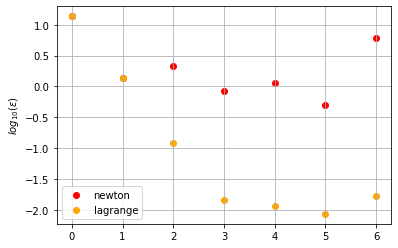

In [202]:
plt.scatter(N[0:7], np.log10(errorN[0:7]), label = 'newton')
plt.scatter(N[0:7], np.log10(error[0:7]), label = 'lagrange')
plt.ylabel("$log_{10}(\epsilon)$")
plt.legend()
plt.grid()

## VI.9.1д

Методом обратной интерполяции найти корень нелинейного уравнения, используя приведенные таблицы. Оценить точность полученного решения.

$$
x - cos(x) = 0
$$

$$ x^{*} = 0.731 $$

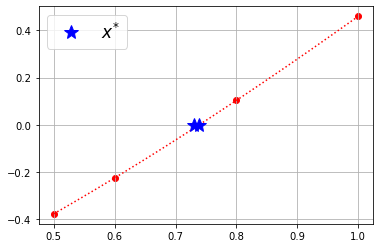

In [203]:
x = np.arange(0.5, 1, 0.001)
f = x - np.cos(x)
xi = np.array([0.5, 0.6, 0.8, 1])
fi = np.array([-0.378, -0.225, 0.103, 0.460])

plt.scatter(xi, fi)
plt.plot(x, f, ':')
plt.plot([0.731, 0.739], [0, 0], marker = '*', markersize = 15,color = 'b', label = '$x^{*}$', linewidth = 0)

plt.grid()
plt.legend(fontsize = 17)

$$ x = f^{-1}(y)$$
$$ x \sim P_3(y) $$
$$ x^{*} = P_3(0) $$

In [204]:
i_max = 10

def func(x): return x - np.cos(x)

def inverseInterpolation(x, f, n, i_max):

    if np.around(f(x[2]), decimals=3)==0 : 
        print(x[2])
        return x[2]
    else:
        x_new = np.zeros(3)

        f0 = np.around(f(x[0]), decimals = 3)
        f1 = np.around(f(x[1]), decimals = 3)
        f2 = np.around(f(x[2]), decimals = 3)

        x_new[0] = x[1]
        x_new[1] = x[2]
        x_new[2] = x[0]*f1*f2/(f0 - f1)/(f0 - f2) + x[1]*f0*f2/(f1 - f0)/(f1 - f2) + x[2]*f0*f1/(f2 - f0)/(f2 - f1) 
        inverseInterpolation(x_new, f, n+1, i_max)

answer1 = inverseInterpolation(xi[0:3], func, 0, i_max)

answer2 = inverseInterpolation(xi[1:4], func, 0, i_max)

print(func(0.731))
print(func(0.739))

0.7393073075282545
0.7388708946281022
-0.013507160233841575
-0.00014247729458616298


# Тема VII

## K4(e)

Проинтегрировать заданную функцию y=f(x) на заданном отрезке методом трапеций, сделать уточнение результата экстраполяцией Ричардсона. Сравнить результат с вычислением по формуле Симпсона. Сравнить с точным значением интеграла.  Для вычислений сгенерировать значения функции на равномерной сетке из 9 узлов, округленные до 6 знаков после запятой.

$$y=x3\text{, } xϵ[0,1]$$

$$\int_0^1 x^3 dx = \dfrac{x^4}{4}|_0^1 = \dfrac{1}{4}$$

$$ \epsilon = \dfrac{1}{12}\max\limits_{a \leqslant x \leqslant b} |f''(x)| (b - a)h^2$$

I_h, eps_max =  [0.25308644444444445, 0.006172839506172839]
I_2h, eps_max =  [0.2507716111111111, 0.0015432098765432098]
Richardson 0.25
Simpson, eps_max =  [0.25, 0.0]
Rectangular, eps_max =  [0.249614, 0.0007716049382716049]


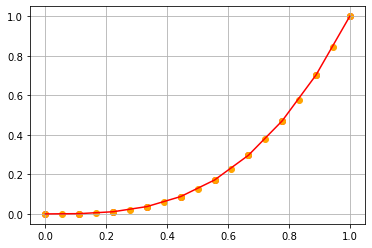

In [285]:
N = 9
def func(x): return x**3
x = np.linspace(0, 1, N+1)
x2 = np.linspace(0, 1, 2*N+1)

def IntRectangular(x, func, N, dfmax, decimals):
    I = 0
    h = h = x[1] - x[0]
    for i in range(N):
        xi = (x[i]+x[i+1])/2
        I+=np.around(func(xi)*h, decimals = decimals)
    return [I, 1/24*dfmax*(max(x)-min(x))*h**2]

def IntTrapezoidal(x, func, N, dfmax, decimals):
    I = 0
    h = x[1] - x[0]
    for i in range(N): 
        f1 = np.around(func(x[i]), decimals=decimals)
        f2 = np.around(func(x[i+1]), decimals=decimals)
        I+=(f1 + f2)*h/2
    return [I, 1/12*dfmax*(max(x)-min(x))*h**2]

def IntSimpson(x, func, N, dfmax, decimals):
    I = 0
    h = x[1] - x[0]
    for i in range(N//2): 
        f1 = np.around(func(x[2*i]), decimals=decimals)
        f2 = np.around(func(x[2*i+1]), decimals=decimals)
        f3 = np.around(func(x[2*i+2]), decimals=decimals)
        I+=(f1 + 4*f2 + f3)*h/3
    return [I, 1/180*dfmax*(max(x)-min(x))*h**4]

I = IntTrapezoidal(x, func, N, 6, 6)
print("I_h, eps_max = ", I)

I2 = IntTrapezoidal(x2, func, 2*N, 6, 6)
print("I_2h, eps_max = ", I2)

IR = I2[0] + (I2[0] - I[0])/3

print('Richardson', IR)

IS = IntSimpson(x2, func, 2*N, 0, 6)
print("Simpson, eps_max = ", IS)

Ir = IntRectangular(x2, func, 2*N, 6, 6)
print("Rectangular, eps_max = ", Ir)

plt.plot(x, func(x))
plt.scatter(x, func(x))
plt.scatter(x2, func(x2))
plt.grid()


72.35624726114766


[72.35628235153722, 8.573941950011525]

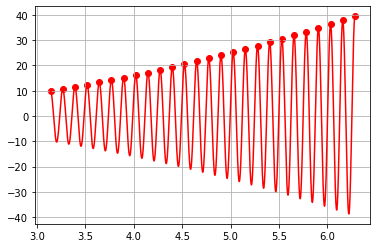

In [314]:
def fun(t): 
    return t**2*np.cos(50*t)

X = np.array([pi + pi*n/25 for n in range(26)])
x2 = np.arange(pi, 2*pi, 0.00001)
plt.scatter(X, fun(X))
plt.plot(x2, fun(x2))
plt.grid()

Int = [x**2*cos(50*x) for x in X]
i = 0.5*( Int[0] + Int[25] + 2*sum(Int[1:25]))*(pi/25)
print(i)

Icos = IntTrapezoidal(x, fun, 25, 50*(2*pi)**2 + 100, 3); Icos


In [206]:
x = np.arange(-3, 6, 1)
x2 = np.arange(-3, 6, 2)

f = np.array([9.34, 2.34, -0.11, 1.00, 4.11, 7.66, 10.7, 13.1, 16.0])
f2 = np.array([9.34,  -0.11, 4.11, 10.7, 16])

def IntTrapezoidal2(x, func, N, dfmax, decimals):
    I = 0
    for i in range(N): 
        f1 = np.around(func[i], decimals=decimals)
        f2 = np.around(func[i+1], decimals=decimals)
        h = x[i+1] - x[i]
        I+=(f1 + f2)*h/2
    return [I, 1/12*dfmax*(max(x)-min(x))*h**2]

i= IntTrapezoidal2(x, f, 8, 5, 2)
i2= IntTrapezoidal2(x2, f2, 4, 5, 2)

print(i)
print(i2)

IR = 51.47 + (51.47 - 54.74)/3

print(IR)

def IntSimpson2(x, func, N, dfmax, decimals):
    I = 0
    h = 2
    for i in range(0, 3): 
        f1 = np.around(func[i], decimals=decimals)
        f2 = np.around(func[i+1], decimals=decimals)
        f3 = np.around(func[i+2], decimals=decimals)
        I+=(f1 + 4*f2 + f3)*h/3
    return [I, 1/180*dfmax*(max(x)-min(x))*h**4]


iS= IntSimpson2(x2, f2, 4, 1.1, 2)
print(iS)

print(-7 - 2.275 -1.192*(-4))
print(2.9 + 0.25 + 0.19*(-25))
print(51.47 - 0.5*(-1.6 + 4.507) - 50.34)
print(2466.16/8)



[51.47, 3.333333333333333]
[54.739999999999995, 13.333333333333332]
50.379999999999995
[68.63333333333333, 0.7822222222222223]
-4.507000000000001
-1.6
-0.3235000000000028
308.27


## VII.9.10(г)

Вычислить несобственный интеграл с точностью $\varepsilon = 10^{–4}$:

$$ I = \int_{0}^{1} \frac{ln(x^2+1)}{\sqrt{x}} dx = \int_{0}^{\delta} \frac{ln(x^2+1)}{\sqrt{x}} dx + \int_{\delta}^{1} \frac{ln(x^2+1)}{\sqrt{x}} dx = I_1 + I_2$$

Данный интеграл имеет особенность в точке 0. 

$$ I \approx 0.32208 $$

<ipython-input-207-42b134af221c>:2: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(x, np.log(x**2+1)/x**0.5)
<ipython-input-207-42b134af221c>:3: RuntimeWarning: invalid value encountered in power
  plt.plot(x, x**(3/2))


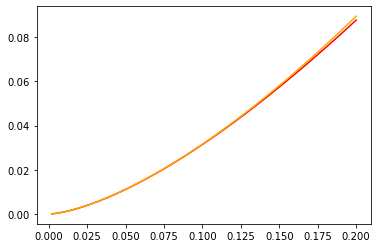

In [207]:
x = np.linspace(-0.15, 0.2, 100)
plt.plot(x, np.log(x**2+1)/x**0.5)
plt.plot(x, x**(3/2))


In [208]:
def func2(x): return np.log(1 + x**2)/np.sqrt(x)

#Оценим шаг сетки для заданной точности eps/2 = 0.5 * 10e-4
eps = 0.5*10e-5
#max of 2nd derivative
maxd2f = 0.48014
#delta влияет на погрешность метода симпсона, т.к. 4-я произв ф-ии неогр. возр. при х -> 0

#подбираем delta так чтобы I1 < epsilon/2

delta = (5/4*10e-5)**(2/5)
print("delta", delta)

h_rect = np.sqrt( 24*eps/maxd2f/1 )
N_rect = int(np.rint(1/h_rect))
x_rect = np.linspace(delta, 1, N_rect+1)

h_tr = np.sqrt( 12*eps/maxd2f/1 )
N_tr = int(np.around(1/h_tr))
x_tr = np.linspace(delta, 1, N_tr+1)



delta 0.02746401358265294


0.3219888331 5e-05


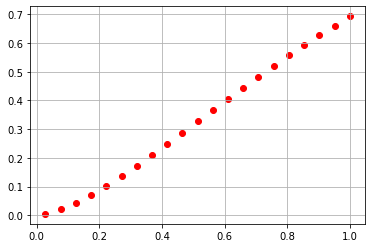

In [209]:
# прямоугольники

I_rect = IntRectangular(x_rect, func2, N_rect, maxd2f, 10)
print(I_rect[0], np.around(I_rect[1], decimals=5))
plt.scatter(x_rect, func2(x_rect))
plt.grid()

0.32206884053885526 5e-05


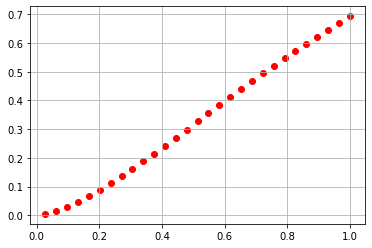

In [210]:
# Трапеции

I_tr = IntTrapezoidal(x_tr, func2, N_tr, maxd2f, 10)
print(I_tr[0], np.around(I_tr[1], decimals=5))

plt.scatter(x_tr, func2(x_tr))
plt.grid()

# Тема VIII

## 10.2(б)

Выбрать метод численного решения системы ОДУ и найти решение

$$
\begin{equation}
    \begin{cases}

    \dfrac{dv}{dt} = v\cdot w\\
    \dfrac{dw}{dt} = v+ w \\
    v(1) = 2 \\
    w(1) = 3
    \end{cases}
\end{equation}
$$

$$ t \in [1; 2]$$



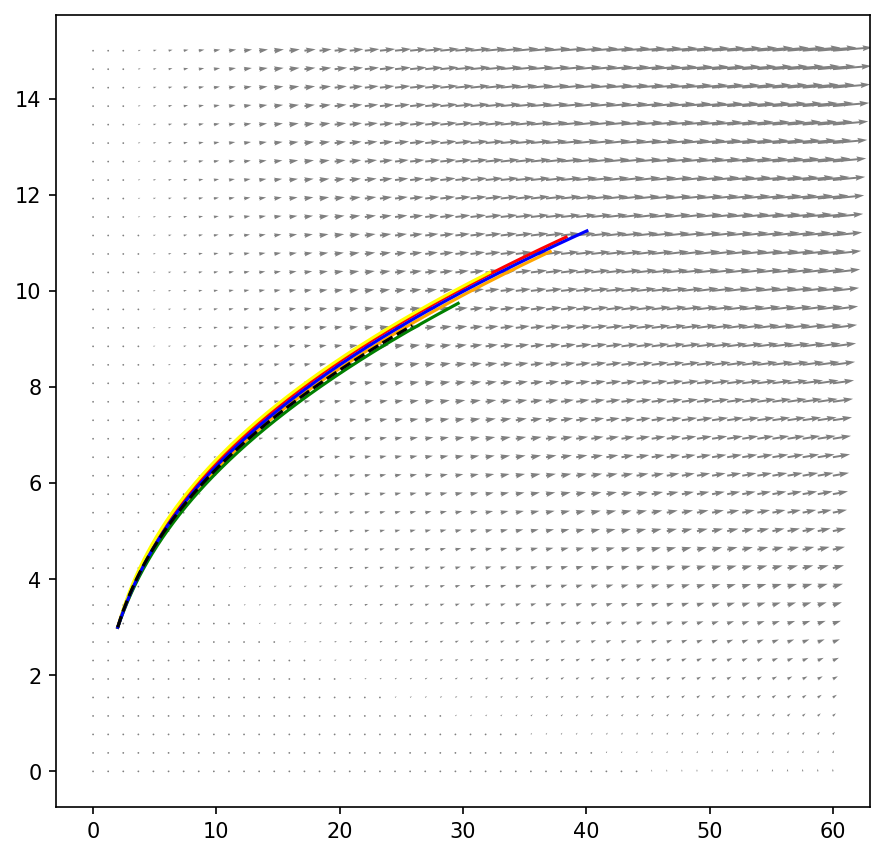

In [252]:
fig4 = plt.figure(figsize=(7, 7), dpi=150)
u,w = np.meshgrid(np.linspace(0,60, 50),np.linspace(0,15,40))
U = 4*u*w
V = 4*(u+w)
plt.quiver(u, w,U, V, color = 'grey')

def Euler(n, u0, v0, ODE, t1, t2, epsilon1, epsilon2):
    tau = (t2-t1)/n/10
    N = n*5
    u = np.zeros(N)
    v = np.zeros(N)
    u[0] = u0
    v[0] = v0
    for i in range(1, N):
        u[i], v[i] = ODE(u[i-1], v[i-1], tau, epsilon1, epsilon2)
    return u, v

def ODE(u, w, tau, epsilon1, epsilon2):
    return u + (u*w+epsilon1)*tau, w + (u+w + epsilon2)*tau

for i in range(5):
    epsilon1 = np.random.random()
    epsilon2 = np.random.random()
    x2, y2 = Euler(100, 2, 3, ODE ,1 , 2, 2*epsilon1, 2*epsilon2)
    plt.plot(x2, y2, linestyle = '-')


x1, y1 = Euler(100, 2, 3, ODE ,1 , 2, 0, 0)
plt.plot(x1, y1, linestyle = '--', color = 'k')

# plt.plot(x1, y1, linestyle = ':')
# plt.scatter(x1, y1, marker='.')

$$  $$

1 Является ли задача интерполяции корректной? $\newline$
2 В чем принципиальное различие глобальной интерполяции и интерполяции сплайнами? $\newline$
3 Интерполяционный многочлен в форме Лагранжа $\newline$
4 Интерполяционный многочлен в форме Ньютона $\newline$
5 Теорема о многочлене, наименее отклоняющемся от нуля $\newline$
6 Какие 2 группы методов решения нелинейных уравнений выделяют, в чем их принципиальное различие? $\newline$
7 Какой метод сходится быстрее: метод дихотомии или секущих? $\newline$
Как быстро сходится метод Ньютона в случае некратных и кратных корней? $\newline$
В каком случае используются квадратурные формулы Ньютона-Котеса, а в каком - Гаусса? $\newline$
Формулы интерполяционного типа, их порядки аппроксимации $\newline$
Как на практике оценить погрешность численного интегрирования? $\newline$
Какие методы существуют для повышения порядка аппроксимации формул численного интегрирования? $\newline$
13 Как вычисляют интегралы от быстроосциллирующих функций? $\newline$
Как вычислять несобственные интегралы? $\newline$
Как устроены квадратурные формулы Гаусса? $\newline$ 
Как вычислять интегралы с известной весовой функцией? $\newline$
Дайте определение аппроксимации, устойчивости, сходимости. $\newline$
В чем заключается основная теорема вычислительной математики? $\newline$


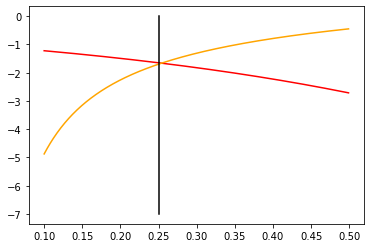

In [212]:
x = np.arange(0.1, 0.5, 0.001)

plt.plot(x, -np.exp(2*x))
plt.plot(x, (2*x**2 -1)/(x**3 + 2*x))
plt.plot([0.25, 0.25], [0, -7], 'k')

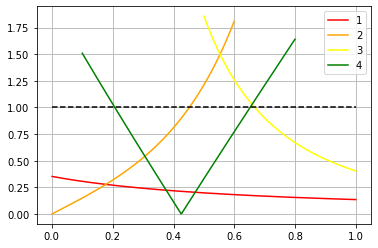

In [213]:
x = np.arange(0.001, 1, 0.001)
plt.plot(x, 1/np.sqrt(2)/( 2*np.sqrt( np.log(x+1) + 1) )/(1+x), label = '1')
x = np.arange(0.001, 0.6, 0.001)
plt.plot(x, 4*x*np.exp(2*x**2 - 1), label = '2')
x = np.arange(0.5, 1, 0.001)
plt.plot(x, (2*x/(x+1) - 2*(np.log(x+1)-1))/(4*x**2), label = '3')
x = np.arange(0.1, 0.8, 0.001)
plt.plot(x, np.abs(1 + 1/(1+x) - 4*x), label = '4')


plt.plot([0, 1], [1, 1], 'k--')
plt.grid()
plt.legend()

plt.savefig('1117.png')

In [214]:
1/2 - 5/8 + 1/60 - 1/700 + 29/100

0.1802380952380952

In [215]:
4*8 -39*4+94*2-35

29

In [216]:
-3/8 + 1/5

-0.175

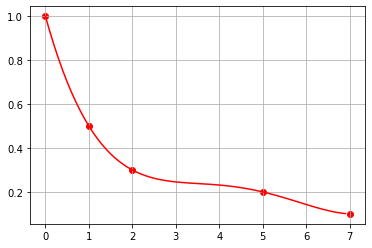

In [217]:
x = np.arange(0, 7, 0.1)

plt.plot(x, (x - 1)*(x - 2)*(x - 5)*(x -7)/70 - x*(x - 2)*(x - 5)*(x -7)/48 + x*(x - 1)*(x - 5)*(x -7)/100 - x*(x - 1)*(x - 2)*(x -7)/600 + x*(x - 1)*(x - 2)*(x -5)/4200)

plt.scatter([0, 1, 2, 5, 7], [1, 0.5, 0.3, 0.2, 0.1])

plt.grid()
plt.savefig('92.png')

In [218]:
x = 2

(x - 1)*(x - 5)*(x -7)/70 - x*(x - 5)*(x -7)/48 - x*(x - 1)*(x -7)/600 + x*(x - 1)*(x -5)/4200 + (4*x**3 - 39*x**2 + 94*x - 35)/100

-0.1054761904761905

In [219]:
a = np.eye(10);a

print(a[:2, :9])

[[1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]]


In [220]:
t1 = 1/2*(1/np.sqrt(3) + 1)
t2 = 1/2*(-1/np.sqrt(3) + 1)

x1 = 1/t1**2 -1
x2 = 1/t2**2 -1

print(x1, x2)

0.6076951545867362 21.39230484541327


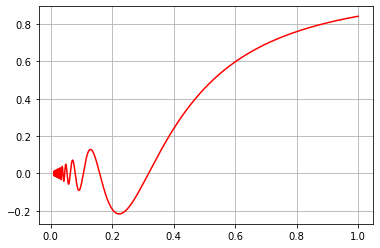

In [221]:
t = np.arange(0.01, 1,0.0001)

plt.plot(t, t*np.sin(1/t))
plt.grid()

plt.savefig("824_0.png")

0.8414709848078965 0.0005976143046671969
236643
[1.         1.00059339 1.00118678 1.00178016 1.00237355 1.00296694
 1.00356033 1.00415371 1.0047471  1.00534049 1.00593388 1.00652726
 1.00712065 1.00771404 1.00830743 1.00890081 1.0094942  1.01008759
 1.01068098 1.01127436]
0.37853042864323205 2.47217e-05


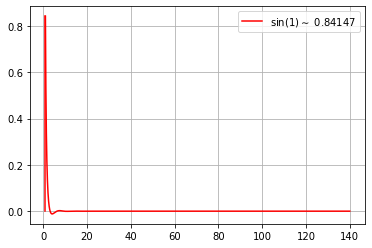

In [224]:
t = np.arange(1, 140,0.0001)

plt.plot(t, np.sin(t)/t**3)
plt.plot([1, 1], [0, 0.8414709848078965], 'r', label = 'sin(1)$\sim$ 0.84147')
print(np.sin(1), np.sqrt(5e-5/140))
plt.grid()
plt.legend()
plt.savefig("824.png")

h = np.sqrt(5e-5/140)

def func2(x): return np.sin(x)/x**3
N_tr = int(np.around(141.421/h))
print(N_tr)
x_tr = np.linspace(1, 141.421, N_tr+1)
print((x_tr[:20]))
maxd2f = 6
I_tr = IntTrapezoidal(x_tr, func2, N_tr, maxd2f, 10)
print(I_tr[0], np.around(I_tr[1], decimals=10))
